In [1]:
from sklearn import tree
import pandas as pd
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
X = pd.read_json('../generate_data/data.json' , orient="records")
y = [random.choice([0,1]) for _ in range(0, 100)]

In [3]:
geolocation = X['location [lat, lng]'].str.split(', ', n=1, expand=True)
X['lat'] = geolocation[0]
X['lng'] = geolocation[1]
X['2,4 GHz'] = X['2,4 GHz'].astype(int)
X['5 GHz'] = X['5 GHz'].astype(int)
X = X.drop(columns=['location [lat, lng]', 'price'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.head()

,duration [min],maximum velocity at rated value [km/h],max. monitoring radius [m],"2,4 GHz",5 GHz,energy consumption [kW/h],lat,lng
28,39,63,57,0,0,5.65,52.4912474,9.8586662
93,74,53,81,0,1,7.53,47.6105764,8.2250843
5,39,22,93,0,0,1.66,48.9579076,6.0354276
66,32,91,48,1,0,4.75,52.8458610,8.0992984
65,31,79,71,1,0,8.18,47.4685793,7.9777152


In [4]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

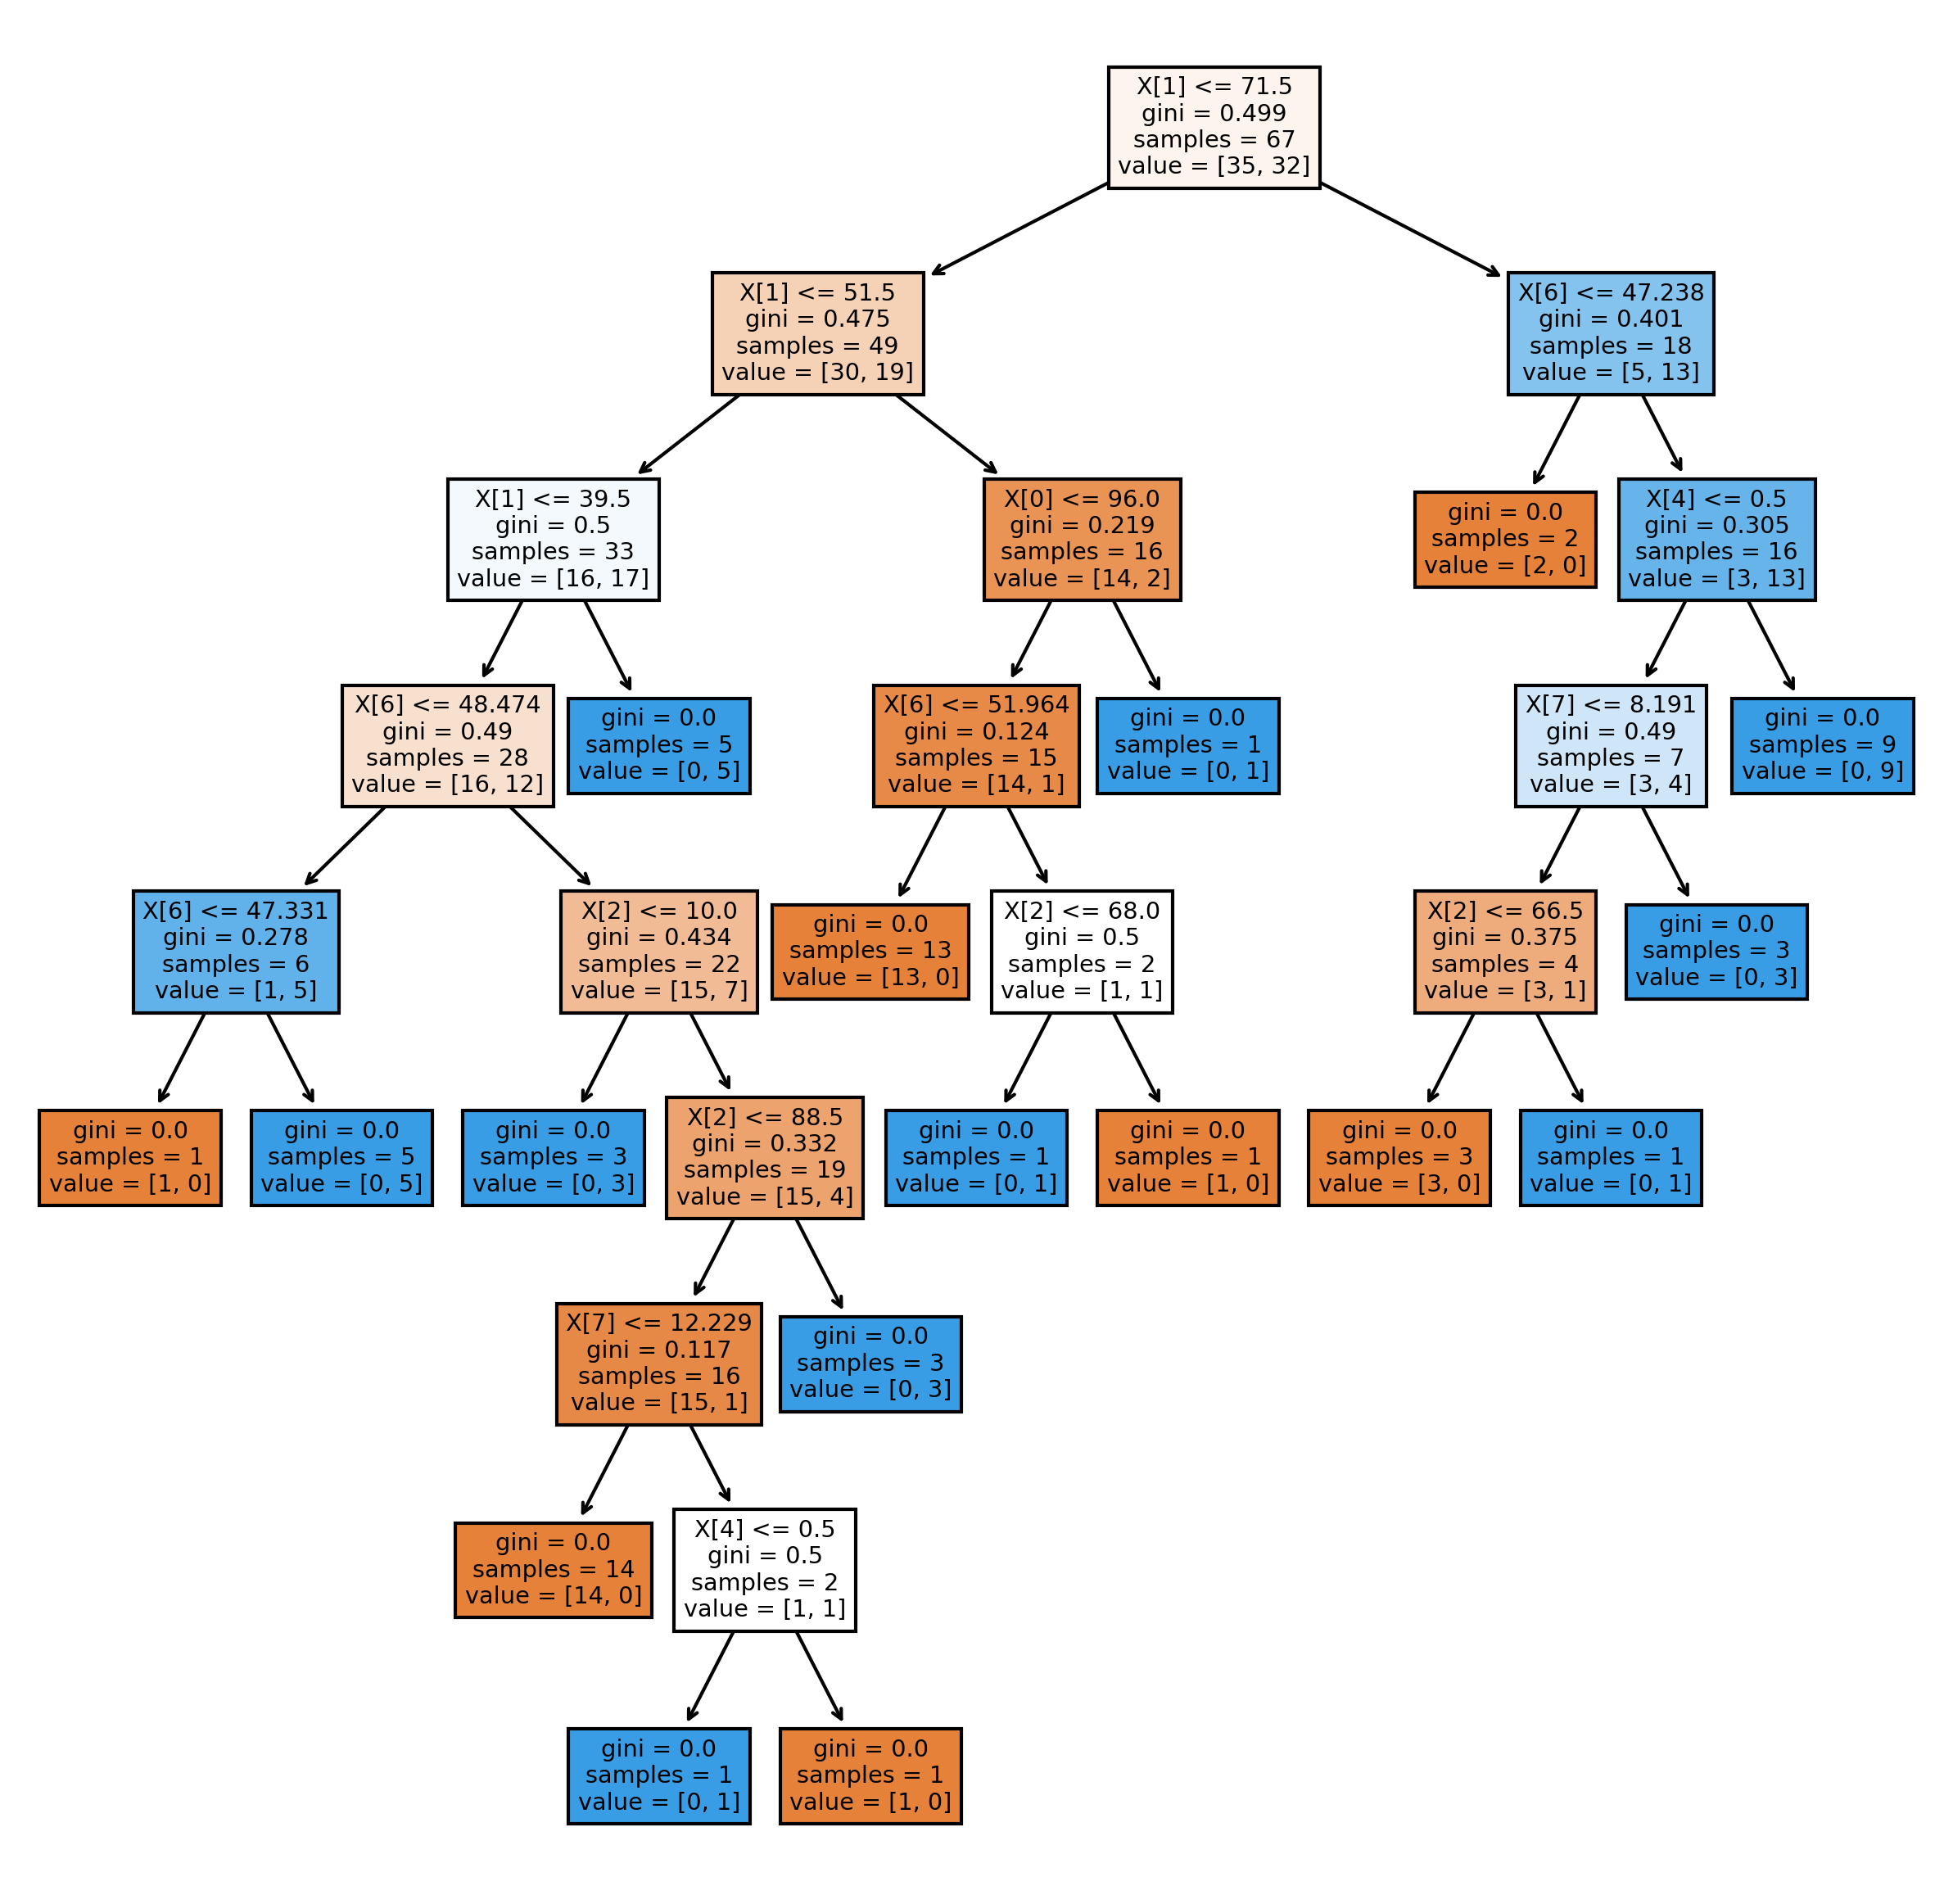

In [5]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
x = tree.plot_tree(clf, filled=True) 

In [6]:
test = X.iloc[3]
clf.predict([test])

array([1])

In [8]:
import pickle
filename = '../saved_model/finalized_model.sav'
with open(filename, 'wb') as f:
    pickle.dump(clf, f)